In [91]:
import pandas as pd
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
sd = dataset['train'].to_pandas()

sd['job_posted_date'] = pd.to_datetime(sd['job_posted_date'])
sd['job_skills'] = sd['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [92]:
sd_DA_in = sd[(sd['job_title_short']== 'Data Analyst') & (sd['job_country'] == 'India')] .copy()
sd_DA_in

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
123,Data Analyst,Data Analytics work from home job/internship a...,Anywhere,via LinkedIn,Part-time,True,India,2023-03-07 13:37:56,False,False,India,None,NaN,NaN,Inoket Solutions Private Limited,"[sql, excel, word, powerpoint, outlook, power bi]","{'analyst_tools': ['excel', 'word', 'powerpoin..."
159,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Contractor,False,India,2023-11-28 13:12:07,False,False,India,None,NaN,NaN,Fusion Plus Solutions Inc,[sql],{'programming': ['sql']}
171,Data Analyst,Data Base work from home job/internship at Mga...,Anywhere,via LinkedIn,Full-time,True,India,2023-01-14 13:11:58,False,False,India,None,NaN,NaN,Mgadz Inc,"[sas, sas, sql]","{'analyst_tools': ['sas'], 'programming': ['sa..."
194,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-06-20 13:11:10,False,False,India,None,NaN,NaN,QuEST Global Services Pte. Ltd,"[python, sql, excel, ms access, powerpoint]","{'analyst_tools': ['excel', 'ms access', 'powe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785517,Data Analyst,Analyst - Data Analytics/SQL (2-9 yrs),"Gurugram, Haryana, India",via BeBee India,Full-time,False,India,2023-10-16 06:10:56,False,False,India,None,NaN,NaN,iimjobs,[power bi],{'analyst_tools': ['power bi']}
785548,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-19 06:14:17,False,False,India,None,NaN,NaN,Artech L.L.C.,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785628,Data Analyst,Data Analyst,"Gurugram, Haryana, India",via LinkedIn,Full-time,False,India,2023-01-09 06:08:12,False,False,India,None,NaN,NaN,GUS Global Services India Pvt. Ltd.,"[r, python, sql, sap, power bi, tableau, excel]","{'analyst_tools': ['sap', 'power bi', 'tableau..."
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,"[sql, python, shell, sql server, tableau, micr...","{'analyst_tools': ['tableau', 'microstrategy']..."


In [93]:
sd_DA_in['job_posted_month_no'] = sd_DA_in['job_posted_date'].dt.month


In [94]:
sd_DA_in_explode = sd_DA_in.explode('job_skills')
sd_DA_in_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",sql,"{'analyst_tools': ['power bi', 'excel', 'word'...",7
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",python,"{'analyst_tools': ['power bi', 'excel', 'word'...",7
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",databricks,"{'analyst_tools': ['power bi', 'excel', 'word'...",7
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",power bi,"{'analyst_tools': ['power bi', 'excel', 'word'...",7
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc",excel,"{'analyst_tools': ['power bi', 'excel', 'word'...",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,shell,"{'analyst_tools': ['tableau', 'microstrategy']...",1
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,sql server,"{'analyst_tools': ['tableau', 'microstrategy']...",1
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,tableau,"{'analyst_tools': ['tableau', 'microstrategy']...",1
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,microstrategy,"{'analyst_tools': ['tableau', 'microstrategy']...",1


In [95]:
sd_DA_in_explode['job_skills'].value_counts()

job_skills
sql             3159
python          2203
excel           2117
tableau         1667
power bi        1286
                ... 
clickup            1
hugging face       1
suse               1
graphql            1
ringcentral        1
Name: count, Length: 181, dtype: int64

In [96]:
sd_DA_in_pivot = sd_DA_in_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
sd_DA_in_pivot.loc['Total'] =  sd_DA_in_pivot.sum()
sd_DA_in_pivot = sd_DA_in_pivot.loc[:, sd_DA_in_pivot.loc['Total'].sort_values(ascending=False).index]
sd_DA_in_pivot = sd_DA_in_pivot.drop('Total')
sd_DA_in_pivot

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,305,216,218,159,98,89,128,46,32,43,...,0,1,0,0,0,0,0,0,1,0
2,209,148,156,116,75,67,82,26,33,25,...,0,0,0,0,0,0,0,0,0,0
3,229,151,138,125,76,58,62,45,38,29,...,0,0,0,1,0,0,0,1,0,0
4,204,143,138,98,83,56,52,40,31,28,...,0,0,0,0,0,0,0,0,0,0
5,155,101,106,71,61,42,30,33,22,19,...,0,0,0,0,0,0,0,0,0,1
6,193,150,115,114,77,76,74,37,32,24,...,0,0,0,0,0,0,0,0,0,0
7,245,161,174,124,93,67,78,39,31,31,...,1,0,1,0,0,0,0,0,0,0
8,317,216,192,152,127,112,98,52,63,40,...,0,0,0,0,0,0,0,0,0,0
9,341,229,228,195,168,100,92,35,41,29,...,0,0,0,0,0,0,0,0,0,0


In [97]:
sd_DA_total = sd_DA_in.groupby('job_posted_month_no').size()
sd_DA_total

job_posted_month_no
1     628
2     433
3     422
4     418
5     278
6     367
7     457
8     618
9     630
10    500
11    722
12    648
dtype: int64

In [121]:
sd_DA_in_perc = sd_DA_in_pivot.div(sd_DA_total/100 , axis = 0)

In [122]:
sd_DA_in_perc = sd_DA_in_perc.reset_index()
sd_DA_in_perc['job_posted_month'] = sd_DA_in_perc['job_posted_month_no'].apply(lambda x : pd.to_datetime(x, format='%m').strftime('%b'))
sd_DA_in_perc = sd_DA_in_perc.set_index('job_posted_month')
sd_DA_in_perc = sd_DA_in_perc.drop(columns =['job_posted_month_no'])
sd_DA_in_perc

job_skills,sql,python,excel,tableau,power bi,r,sas,azure,aws,powerpoint,...,hugging face,fastapi,kotlin,powerbi,mariadb,sqlite,clickup,suse,twilio,centos
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,48.566879,34.394904,34.713376,25.318471,15.605096,14.171975,20.382166,7.324841,5.095541,6.847134,...,0.000000,0.159236,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.159236,0.000000
Feb,48.267898,34.180139,36.027714,26.789838,17.321016,15.473441,18.937644,6.004619,7.621247,5.773672,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,54.265403,35.781991,32.701422,29.620853,18.009479,13.744076,14.691943,10.663507,9.004739,6.872038,...,0.000000,0.000000,0.000000,0.236967,0.0,0.000000,0.000000,0.236967,0.000000,0.000000
Apr,48.803828,34.210526,33.014354,23.444976,19.856459,13.397129,12.440191,9.569378,7.416268,6.698565,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
May,55.755396,36.330935,38.129496,25.539568,21.942446,15.107914,10.791367,11.870504,7.913669,6.834532,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.359712
Jun,52.588556,40.871935,31.335150,31.062670,20.980926,20.708447,20.163488,10.081744,8.719346,6.539510,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,53.610503,35.229759,38.074398,27.133479,20.350109,14.660832,17.067834,8.533917,6.783370,6.783370,...,0.218818,0.000000,0.218818,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.294498,34.951456,31.067961,24.595469,20.550162,18.122977,15.857605,8.414239,10.194175,6.472492,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,54.126984,36.349206,36.190476,30.952381,26.666667,15.873016,14.603175,5.555556,6.507937,4.603175,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


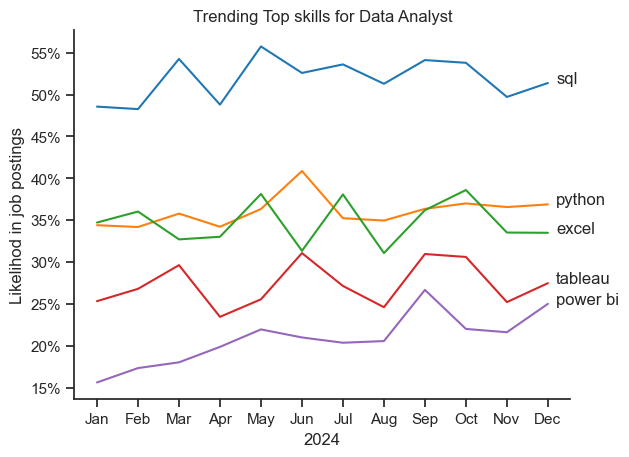

In [128]:
sd_plot = sd_DA_in_perc.iloc[:, :5]
sns.lineplot(data = sd_plot, dashes=False, palette='tab10' )
sns.set_theme(style = 'ticks')
sns.despine()

plt.title('Trending Top skills for Data Analyst')
plt.ylabel('Likelihod in job postings')
plt.xlabel('2024')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals= 0,xmax=100))

for i in range(5):
    plt.text(11.2 , sd_plot.iloc[-1, i], sd_plot.columns[i])